In [1]:
# ###ARBITRARY VALUE IMPUTATION
# It consists of replacing NAN by an arbitrary value

In [2]:
import pandas as pd
df=pd.read_csv('train.csv',usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

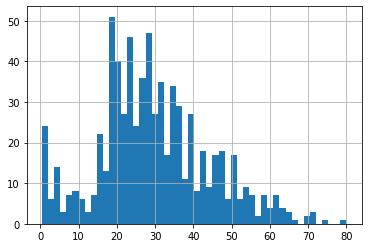

In [7]:
df['Age'].hist(bins=50);

In [9]:
###ARBITRARY VALUES 
### It should not be more frequently present

## 

In [10]:
# Advantages
# Easy to implement
# Captures the importance of missingess if there is one

# Disadvantages
# Distorts the original distribution of the variable
# If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
# Hard to decide which value to use

HANDLING CATEGORICAL MISSSING VALUES 

In [11]:
#FREQUENT CATEGORY IMPUTATION

In [12]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [13]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


%age of missing values

In [14]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [15]:
df.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

In [16]:
#COMPUTE THE FREQUENCY with every feature
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

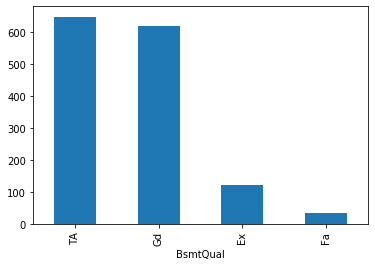

In [20]:
 #COMPUTE THE FREQUENCY with every feature
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot(kind='bar');

In [21]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

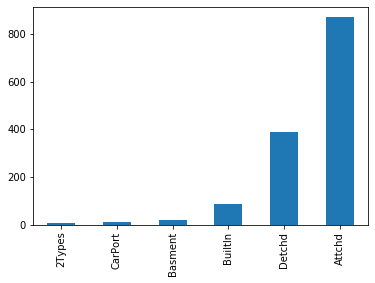

In [23]:
df['GarageType'].value_counts().sort_values(ascending=True).plot(kind='bar');

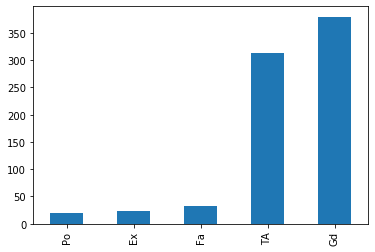

In [25]:
df['FireplaceQu'].value_counts().sort_values(ascending=True).plot(kind='bar');

In [27]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [28]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [29]:
impute_nan(df,'GarageType')

In [30]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [31]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [32]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [33]:
df['GarageType'].mode()[0]

'Attchd'

In [36]:
# # ###ADVANTAGES :
# # 1. Easy to implement
# # 2. Faster way to implement

# # ##DISADVANTAGES
# # 1. Since we are using more frequent labels , it may use them in an over represented way if there are many nan's
# 2. It distorts the relationship of most frequent labels

**ADING A VARIABLE TO CAPTURE NAN**

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [43]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [44]:
import numpy as np
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [45]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [46]:
frequent=df['BsmtQual'].mode()[0]

In [48]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [49]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [50]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [51]:
###SUPPOSE IF YOU HAVE more frequent categories we , just replace nan with a new category

In [52]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [53]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [55]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [56]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [59]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice']:
    impute_nan(df,feature)

In [60]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar,SalePricenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


In [61]:
df=df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'],axis=1)    

In [62]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar,SalePricenewvar
0,208500,Gd,Missing,Attchd,208500
1,181500,Gd,TA,Attchd,181500
2,223500,Gd,TA,Attchd,223500
3,140000,TA,Gd,Detchd,140000
4,250000,Gd,TA,Attchd,250000


In [63]:
df=df.drop(['SalePricenewvar'],axis=1)    

In [64]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
